In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:

target_users = ("@CNN", "@BBC", "@CBSNews", "@FoxNews", "@nytimes")

counter = 0

# List for dictionaries of results
results_list = []
tweet_list = []
user_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through each user


for user in target_users:

    # Variables for holding sentiments
    #compound_list = []
    #positive_list = []
    #negative_list = []
    #neutral_list = []
    #tweet_list = []
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):
        
        oldest_tweet = None

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(user)
            counter += 1
            tweet_list.append(counter)
    # Create a dictionaty of results
    user_results = {
        "Username": user,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
    }

      # Append dictionary to list
    results_list.append(user_results)
    tweets_ago = counter
    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")
    print(tweets_ago)

User: @CNN
Compound: 0.038
Positive: 0.086
Neutral: 0.848
Negative: 0.066
100
User: @BBC
Compound: 0.064
Positive: 0.097
Neutral: 0.834
Negative: 0.069
200
User: @CBSNews
Compound: 0.030
Positive: 0.090
Neutral: 0.830
Negative: 0.080
300
User: @FoxNews
Compound: 0.027
Positive: 0.093
Neutral: 0.824
Negative: 0.083
400
User: @nytimes
Compound: 0.015
Positive: 0.088
Neutral: 0.829
Negative: 0.083
500


In [3]:
results_df = pd.DataFrame(results_list).round(3)

results_df.head()

bar_x = results_df["Username"]

bar_y = results_df["Compound Score"]

In [4]:
tweets_df = pd.DataFrame({ "Username": user_list, "Compound":compound_list, "Tweet Count": tweet_list})

tweets_df_grouped = tweets_df.groupby(user_list)



tweets_file = tweets_df.to_csv("tweets_csv")


#y_axis.head()
#cnn_x = tweets_df_grouped["Tweet Count"].unique().filter(like="@CNN")

#bbc_x = tweets_df_grouped["Tweet Count"].unique().filter(like="@BBC") - 100

#cbs_x = tweets_df_grouped["Tweet Count"].unique().filter(like="@CBSNews")-200

#fox_x = tweets_df_grouped["Tweet Count"].unique().filter(like="@FoxNews")- 300

#ny_x = tweets_df_grouped["Tweet Count"].unique().filter(like="@nytimes")- 400




cnn_df = tweets_df.loc[tweets_df.Username== '@CNN']

bbc_df = tweets_df.loc[tweets_df.Username== '@BBC']

cbs_df = tweets_df.loc[tweets_df.Username== '@CBSNews']

fox_df = tweets_df.loc[tweets_df.Username== '@FoxNews']

ny_df = tweets_df.loc[tweets_df.Username== '@nytimes']

cnn_x = cnn_df["Tweet Count"]

bbc_x = bbc_df["Tweet Count"] - 100

cbs_x = cbs_df["Tweet Count"] - 200 

fox_x = fox_df["Tweet Count"] - 300

ny_x = ny_df["Tweet Count"] - 400
 
cnn_y = cnn_df["Compound"]

bbc_y = bbc_df["Compound"]

cbs_y = cbs_df["Compound"]

fox_y = fox_df["Compound"]

ny_y = ny_df["Compound"]

#joe = df.loc[df.name=='joe']
l_bbc = "BBC"
l_cnn = "CNN"
l_cbs = "CBS"
l_fn = "FOX"
l_ny = "NYT"



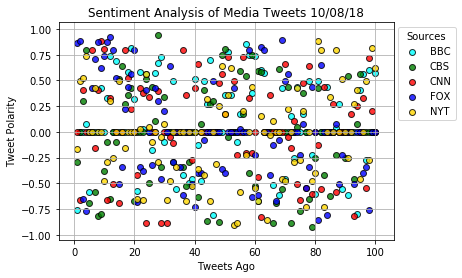

In [5]:





plt.scatter(bbc_x, bbc_y, marker="o", facecolors ="aqua", edgecolors='black', alpha=0.8, label= l_bbc)

plt.scatter(cbs_x, cbs_y, marker="o", facecolors ="green", edgecolors='black', alpha=0.8, label= l_cbs)

plt.scatter(cnn_x, cnn_y, marker="o", facecolors ="red", edgecolors='black', alpha=0.8, label= l_cnn)

plt.scatter(fox_x, fox_y, marker="o", facecolors ="blue", edgecolors='black', alpha=0.8, label= l_fn)
 
plt.scatter(ny_x, ny_y, marker="o", facecolors ="gold", edgecolors='black', alpha=0.8, label= l_ny)

plt.title("Sentiment Analysis of Media Tweets 10/08/18")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc =1, bbox_to_anchor=(1.2, 1), title= "Sources")
plt.grid()
plt.plot
plt.savefig("scatter")

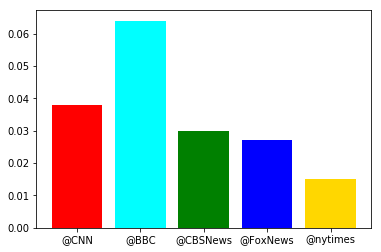

In [6]:

bar_colors = ("red", "aqua", "green", "blue", "gold")
bar_graph = plt.bar(bar_x, bar_y, color=bar_colors)
plt.ylabel = ("Tweet Polarity")
#not sure why the title and label info is not working? 
plt.title = ("Overall Media Sentiment Based On Twitter 10/08/18")
plt.plot
plt.savefig("bar")

In [ ]:
#1) BBC is showing the highest tweet polarity with nytimes showing the lowest. 

#2) There appears to be a large amount of neutral ratings when looking at all the tweets. More analysis would need to be done to confirm if this is significant though.

#3) Overall this data shows that many of the tweets sent out by the media vary greatly when you would expect them to be more clustered near the 0.00 polarity rating.